# 3. 다양한 모델로 분석하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 3.1. 선형모델 분석

### 3.1.1. 선형 회귀 기초 (p76)

#### 3.1.1.1. 모델 선택

In [2]:
from sklearn.linear_model import LinearRegression

#### 3.1.1.2. 지도학습용 데이터 준비

In [3]:
boston = pd.read_csv('data/boston.csv') # boston지역의 부동산 데이터

In [4]:
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = boston.values[:, 0].astype('float32') # 회귀
X = boston.values[:,1:].astype('float32')

In [6]:
X.shape, y.shape # 특징의 갯수 13개

((506, 13), (506,))

In [7]:
from sklearn.model_selection import train_test_split # 훈련, 시험 데이터의 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

#### 3.1.1.3. 모델 훈련 및 평가

In [9]:
model = LinearRegression().fit(X_train, y_train)

In [10]:
w = model.coef_  # p77의 설명 참고 & 13차원짜리 초평면의 기울기라고 보면 된다
b = model.intercept_ # 단일한 스칼라 값이다
print(w,b)

[-1.0756143e-01  5.0331660e-02 -7.1866962e-04  2.0853946e+00
 -1.7543549e+01  4.0833817e+00 -1.0016712e-02 -1.6021624e+00
  2.6284868e-01 -1.2543456e-02 -9.5158428e-01  8.0629084e-03
 -4.4732183e-01] 35.879997


In [11]:
w.shape, b.shape

((13,), ())

In [12]:
w[:3]

array([-0.10756143,  0.05033166, -0.00071867], dtype=float32)

In [13]:
b

35.879997

In [14]:
feature_name =boston.columns[1:]

In [15]:
feature_name[:3]

Index(['CRIM', 'ZN', 'INDUS'], dtype='object')

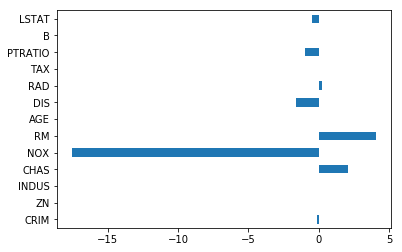

In [16]:
pd.Series(w, index = feature_name).plot(kind ='barh')

#### (참고) boston 데이터에 대한 설명
* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율

In [17]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7387381005138522, 0.7338680011239513)

#### 3.1.1.4. 결과 요약

위 결과는 (0.77371941021470347, 0.58995412112407264) (<-- 이것은 R^2로 계산한 것이며, 실행할 때마다 위 결과와 지금 코멘트값이 다를 것임)

훈련점수가 0.77로 만족스럽지 못하고, 시험점수도 0.59로 만족스럽지는 않다.
과대적합이기도 하지만

1. 먼저 과소적합에서 벗어나야 한다.
2. 그 뒤에 과대적합을 확인하는 방법을 쓴다.

그러려면 (과소적합을 벗어나려면)
1. 모델을 바꿔봐야 한다.
2. 또는 파라미터를 바꿔봐야한다.
3. 또는 데이터에 손을 대는 일도 있다. (아래 설명 참고)
   --> 예를 들면, 새로운 특성을 추가해서 (차원을 추가해서)

#### 3.1.1.5. 선형모델 성능 개선 방법

1. 업무전문가의 도메인 지식을 접목해서 특징(feature)을 발굴한다

또는
2. 데이터 공학 (또는 도메인 지식을 통해서 다른 특징을 찾아내어 feature를 증가시킨다 --> 차원을 확장)

   x1, x2가 있는데 원래 있던 특성을 수학적으로 조합한다  

   x3 = (x1)^2
   
   x4 = x1 * x2
   
   x5 = (x2)^2

### 3.1.2. 특성공학 (feature engineering)

  #### (참고) 교재 p290 : 4.5 상호작용과 다항식

  *  특성공학으로 특성 차원을 강제적으로 확대
  
    --> 기존의 x를 조합해서 새로운 x'으로 만들어 내는 것

#### 3.1.2.1. 특성공학용 라이브러리 적재

In [18]:
from sklearn.preprocessing import PolynomialFeatures

#### 3.1.2.2. 다항식의 생성으로 차원확장

In [19]:
poly = PolynomialFeatures(degree = 2) # x1, x2 -> x1,x2 외에 x1*x1, X1*X2, x2*x2로 하라는 것

In [20]:
poly.fit(X_train) # 학습이라기보다는 데이터의 맞춤으로 보는 것이 낫다

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [21]:
XX_train = poly.transform(X_train)

In [22]:
XX_test = poly.transform(X_test)

In [23]:
X_train.shape, XX_train.shape  # 차원이 늘어났음을 알 수 있다 (13차원 -> 105차원)

((379, 13), (379, 105))

#### 3.1.2.3. 모델 훈련 및 평가

In [24]:
model = LinearRegression().fit(XX_train, y_train)
model.score(XX_train, y_train), model.score(XX_test, y_test)

(0.6952858645611313, 0.6544296317708029)

#### 3.1.2.4. 평가결과의 해석

위 결과를 보면 '(0.90800506763255706, 0.6557083726666536)'  <- 이 숫자는 실행할 때마다 변경될 것이나, 두 숫자의 규모는 크게 변하지는 않을 것임

1. 훈련데이터의 과소적합은 해소되었다 (앞의 분석에서 '0.77371941021470347' -> '0.90800506763255706' 으로 개선
2. 시험데이터의 정확도는 크게 개선되지 않고, 심한 과적합의 효과가 있다

현재 문제는 시험의 정확도가 좋지 않다는 것이다. 

개선할 방법이 두 가지가 있는데,

첫번째, 지금까지 활용하지 않은 분야 전문성(부동산) 지식을 활용하는 방법과

두번째, 모델을 튜닝해보는 것

      1) 모델의 파라미터를 튜닝해보는 것
  
      2) 모델을 교체하는 것

분야 전문성 지식을 활용하기 전에, 두번째 방법인 모델 튜닝을 더 해본다. (교육의 목적에 부합하므로)

but 아쉽게도 선형모델은 모델 튜닝을 할 것이 없다. (튜닝할 파라미터가 없다)

그러므로 모델을 교체한다

### 3.1.3. 리지회귀 사용 (기본 파라미터)

* 리지회귀 : 선형회귀인데, 표현력 조정이 가능한 모델 (교재 p78의 내용 참고)

#### 3.1.3.1. 리지회귀 라이브러리 적재

In [25]:
from sklearn.linear_model import Ridge

#### 3.1.3.2. 모델 훈련 및 평가

In [26]:
ridge = Ridge(alpha = 1.0).fit(XX_train, y_train) # 선형모델이지만 alpha 로 모델 표현력 조정이 가능
train_score = ridge.score(XX_train, y_train)
test_score = ridge.score(XX_test, y_test)
train_score, test_score
  # 아래의 경고는 데이터간 스케일 조정이 되지 않아서...

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.92488e-14): result may not be accurate.
  overwrite_a=True).T


(0.9226037653742037, 0.8684088141343292)

#### 3.1.3.3. 평가 결과의 해석

(0.9358964603511476, 0.79876829908634706) <-- test의 정확도가 많이 향상되었다

### 3.1.4. 리지회귀 모델 튜닝

#### 3.1.4.1. 파라미터를 조절

In [27]:
alpha_range = [0.001, 0.01, 0.1, 1., 10., 100., 1000.] # 10 가 커지도록
result_train = {}
for alpha in alpha_range:
    ridge = Ridge(alpha = alpha).fit(XX_train, y_train) # 선형모델이지만 alpha 로 모델 표현력 조정이 가능
    train_score = ridge.score(XX_train, y_train)
    test_score = ridge.score(XX_test, y_test)
    result_train[alpha] = {'train': train_score, 'test' : test_score}

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.92488e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.92488e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.95913e-15): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.92488e-14): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.72257e-13): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_m

In [28]:
table_result_train = pd.DataFrame(result_train).T # 결과 데이터를 분석 편의상 가로, 세로를 전환 

#### 3.1.4.2. 그리드 서치 결과의 시각화 

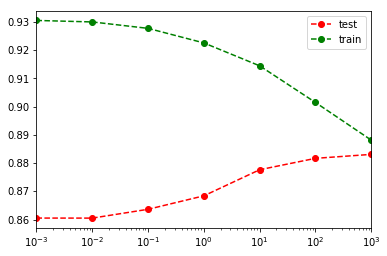

In [29]:
style = {'train': 'go--', 'test' : 'ro--'}
table_result_train.plot(style = style, logx=True)

In [30]:
table_result_train

,test,train
0.001,0.860528,0.930567
0.010,0.860510,0.930037
0.100,0.863636,0.927764
1.000,0.868409,0.922604
10.000,0.877655,0.914482
100.000,0.881697,0.901502
1000.000,0.883098,0.888155


#### 3.1.4.3. 평가결과의 해석

훈련점수가 낮아지는 것은 과대적합하지 않으려는 시도에 따른 현상이고, 

훈련점수를 희생하면서 시험점수를 높이면서 과소적합을 해소하기 위함이다.

위 결과에서 과대적합을 피하면서 훈련점수와 시험점서의 차이가 작은 것을 찾는다.

alpha값에 따른 학습 매개변수 변화 수집 (가중치 벡터 w의 변화를 살펴봄)

In [31]:
alpha_range = [0.001, 0.01, 0.1, 1., 10., 100., 1000.] # 10 가 커지도록
change_weight = {} # 가중치의 변화
result_train = {} # 훈련결과
for alpha in alpha_range:
    ridge = Ridge(alpha = alpha).fit(XX_train, y_train) # 선형모델이지만 alpha 로 모델 표현력 조정이 가능
    w = ridge.coef_
    change_weight[alpha] = w
    train_score = ridge.score(XX_train, y_train)
    test_score = ridge.score(XX_test, y_test)
    result_train[alpha] = {'train': train_score, 'test' : test_score}

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.92488e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.92488e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.95913e-15): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.92488e-14): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.72257e-13): result may not be accurate.
  overwrite_a=True).T
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_m

In [32]:
table_result_train = pd.DataFrame(result_train).T

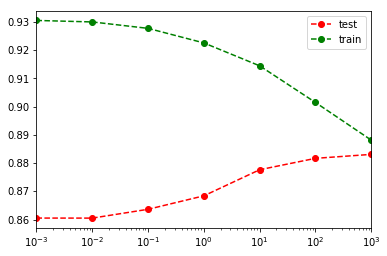

In [33]:
style = {'train': 'go--', 'test' : 'ro--'}
table_result_train.plot(style = style, logx=True)

In [34]:
w

array([ 0.0000000e+00,  1.3410593e-04, -5.0570767e-02,  6.5564027e-04,
        3.3795022e-04,  1.2563748e-03,  1.9251838e-02,  4.3869857e-02,
       -8.2077701e-03,  9.0081384e-03, -3.6360677e-02, -8.5718725e-03,
        9.6279807e-02,  9.4220927e-03, -2.1951912e-04,  5.8560889e-02,
        4.9910963e-02,  8.7917499e-02, -4.8074038e-03,  5.7557706e-02,
       -7.3966607e-03, -8.2183048e-02, -4.2518806e-02,  6.6469325e-04,
       -9.3370359e-03,  2.6613707e-04,  3.9904253e-03,  2.7342857e-04,
        1.0928351e-03, -6.1141192e-03,  5.4999888e-03,  6.3534558e-02,
        5.0272763e-04, -3.2227729e-03, -7.7412096e-03,  5.1657151e-04,
        2.0243274e-03, -1.3860976e-03, -4.2468589e-03,  2.1644527e-02,
       -2.4264893e-02,  9.8922178e-03,  3.3260189e-02,  6.7304899e-03,
       -1.4003898e-02,  2.0205133e-02,  7.6346099e-04, -6.4522550e-02,
       -1.1328562e-04, -2.7139749e-02,  3.3799419e-04, -3.5501418e-03,
       -4.4825412e-02, -2.0992834e-02,  2.0743338e-03,  2.1083878e-02,
      

In [35]:
size_w_vector = {} # 가중치벡터 크기
for alpha, w in change_weight.items():
    size_w_vector[alpha] = np.sum(w**2)

In [36]:
pd.Series(size_w_vector)

0.001       8011.349609
0.010       3018.380371
0.100        724.855347
1.000        107.832497
10.000        17.713747
100.000        1.817679
1000.000       0.210266
dtype: float64

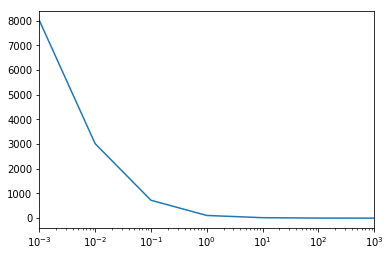

In [37]:
pd.Series(size_w_vector).plot(logx = True)

In [38]:
w_alpha_1000 = change_weight[1000]
w_alpha_0001 = change_weight[0.001]

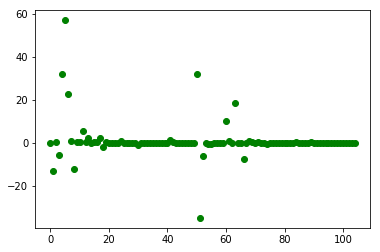

In [39]:
plt.plot(w_alpha_0001, 'go')

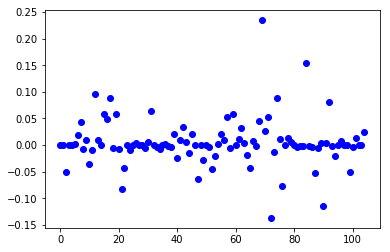

In [40]:
plt.plot(w_alpha_1000, 'bo')

(-1, 1)

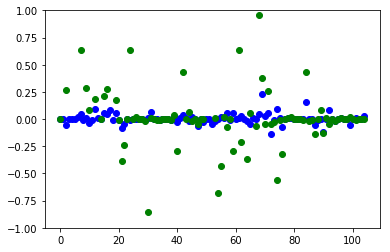

In [41]:
# 두 플롯을 한꺼번에 그리기
plt.plot(w_alpha_1000, 'bo')
plt.plot(w_alpha_0001, 'go')
plt.ylim(-1, 1)

(교재 p81 참고)

alpha = 1000 와 alpha = 0.001 일 때, 모델의 계수를 보면 alpha가 작을수록 계수가 커지는 것을 알 수 있다.

선형분류
 1. 퍼셉트론
 2. 로지스틱 회귀

### 3.1.5. 선형분류 (퍼셉트론)

#### 3.1.5.1. 데이터 적재

In [42]:
cancer = pd.read_csv('data/cancer.csv')

In [43]:
y = cancer.values[:, 0]
X = cancer.values[:, 1:].astype('float32')

#### 3.1.5.2. 분석 데이터 준비

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

#### 3.1.5.3. 퍼셉트론 라이브러리 적재

1958년 퍼셉트론 : 최초의 학습 알고리즘

In [45]:
from sklearn.linear_model import Perceptron

#### 3.1.5.4. 모델 훈련 및 평가

In [46]:
perceptron = Perceptron(max_iter= 10).fit(X_train, y_train) # 최대학습횟수 10회

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [47]:
perceptron.score(X_train, y_train), perceptron.score(X_test, y_test)

(0.9061032863849765, 0.8811188811188811)

### 3.1.6. 선형분류 (로지스틱 회귀분석, 기본 파라미터)

#### 3.1.6.1. 로지스틱 회귀분석 라이브러리 적재

1961년 로지스틱 회귀 : 퍼셉트론의 개선

In [48]:
from sklearn.linear_model import Perceptron, LogisticRegression

#### 3.1.6.2. 모델 훈련 및 평가

In [49]:
logreg = LogisticRegression(C=1.0).fit(X_train, y_train) # 표현력 조절

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.960093896713615, 0.951048951048951)

정확도 (0.9647887323943662, 0.916083916083916)로 나타난다 <-- 이 수치는 코드를 실행할 때마다 달라질 것임

그렇더라도, 퍼셉트론보다 로지스틱 회귀분석의 분류가 더 정확도가 높다는 것을 확인할 수 있다.

#### 3.1.6.3. 로지스틱 회귀분석의 장점

(p161) 2.4 분류예측의 불확실성을 추정할 수 있다는 것이 장점

In [51]:
prob  = logreg.predict_proba(X_test) # 예측확률

In [52]:
pd.DataFrame(prob, columns=['악성','양성']) 

,악성,양성
0,9.968063e-01,0.003194
1,9.696396e-01,0.030360
2,6.372740e-08,1.000000
3,9.704512e-01,0.029549
4,9.421687e-01,0.057831
5,9.998590e-01,0.000141
6,3.803261e-01,0.619674
7,3.279152e-03,0.996721
8,9.498656e-01,0.050134
9,9.822550e-01,0.017745


위 표를 읽는 법 (맨 위의 데이터 읽는 법 --> 0.95로 악성으로 예측, 0.5로 양성일 확률)  <- 코드 실행할 때마다 값이 달라지므로 유의

4번째 결과는 악성 0,양성은 1.0의 확률이 된다는 것 (부동소숫점 연산의 특성으로 0으로 본다)   <- 코드 실행할 때마다 값이 달라지므로 유의

퍼셉트론에서는 1과 0 이분법적으로 보이지만, 시그모이드에서는 연속적인 값으로 확인할 수 있다는 것이 특징

In [53]:
pd.DataFrame(prob, columns=['악성','양성']).sample(10)

,악성,양성
37,0.994942,0.005058
33,0.692671,0.307329
50,0.985415,0.014585
56,0.991537,0.008463
10,0.999267,0.000733
111,0.999602,0.000398
16,0.976366,0.023634
123,0.997803,0.002197
125,0.997173,0.002827
64,0.861972,0.138028


### 3.1.7. 로지스틱 회귀 모델 튜닝

#### 3.1.7.1. 파라미터를 조절

In [54]:
C_range = [0.001, 0.01, 0.1, 1., 10. , 100., 1000.]
result_train = {}
for C in C_range:
    logreg = LogisticRegression(C=C).fit(X_train,y_train)
    train_score = logreg.score(X_train, y_train)
    test_score = logreg.score(X_test, y_test)
    result_train[C] = {'train' : train_score,'test' : test_score}

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [55]:
table_result_train = pd.DataFrame(result_train).T

#### 3.1.7.2. 그리드 서치 결과의 시각화

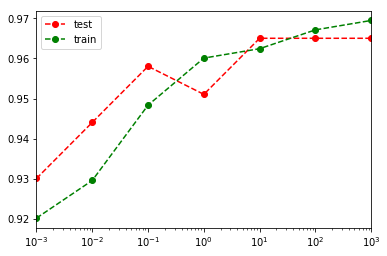

In [56]:
table_result_train.plot(style = style, logx=True)

#### 3.1.7.3. 평가결과의 해석

훈련점수가 높으면, 표현력이 크다는 것
표현력을 제한하면 성능이 작아진다

시험점수를 볼 때는, 훈련점수와의 간격을 본다 (간격이 작을 수록 좋은 것)

(참고 교재 p97) 장단점과 매개변수 항목 참고

## 3.2. 결정트리

### 선형 모델외에 많이 쓰이는 머신러닝 알고리즘으로 비선형적 데이터에도 좋은 성능을 낸다

### 3.2.1. 결정트리 (기본 파라미터 활용)

#### 3.2.1.1. 결정트리 라이브러리의 적재

In [57]:
from sklearn.tree import DecisionTreeClassifier

####  3.2.1.2. 분석 데이터 준비

In [58]:
y = cancer.values[:, 0]

In [59]:
X = cancer.values[:, 1:].astype('float32')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3.2.1.3. 모델 훈련 및 평가

In [61]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.9090909090909091)

결정트리에서는 훈련데이터는 분류할 때까지 분류하는 것이므로, 1.0이 늘 나온다
(1.0, 0.92307692307692313) <-- 우측의 숫자는 평가를 할 때마다 다르게 나올 것임 (but 전체 맥락을 보는데는 문제없음)

즉 과소적합에 대해서는 걱정할 필요가 없다.
하지만... 과대적합을 고려해야한다

In [62]:
tree.tree_.max_depth # 만들어진 결정트리의 최대 깊이  # tree_ 의 의미 -> '훈련'

6

### 3.2.2. 결정트리 모델 튜닝

최대깊이를 제한하여 과적합을 개선한다

#### 3.2.2.1. 트리의 깊이를 조정하여 모델 비교

트리의 깊이를 조정해서 모델의 성능을 비교해본다

In [63]:
tree_d4 = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
tree_d4.score(X_train, y_train), tree_d4.score(X_test, y_test)

(0.9953051643192489, 0.8881118881118881)

In [64]:
tree_d5 = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
tree_d5.score(X_train, y_train), tree_d5.score(X_test, y_test)

(0.9976525821596244, 0.9090909090909091)

In [65]:
tree_d3 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
tree_d3.score(X_train, y_train), tree_d3.score(X_test, y_test)

(0.9741784037558685, 0.8811188811188811)

In [66]:
tree_d4.tree_.max_depth

4

In [67]:
tree_d2 = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
tree_d2.score(X_train, y_train), tree_d2.score(X_test, y_test)

(0.9413145539906104, 0.8671328671328671)

위 트리의 깊이에 따른 모델의 성능을 비교해본다. 

과대적합을 피하면서 train score와 test score의 차이가 적은 모델이 무엇인지 확인한다

### 3.2.3. 결정트리의 장점

결정트리를 자주 사용하는 또 다른 이유는 모델의 시각화에 용이하기 때문이다.

#### 3.2.3.1. 그래프 라이브러리의 적재

In [68]:
from sklearn.tree import export_graphviz

In [69]:
export_graphviz(tree_d3, out_file ='tree.dot', class_names=['M', 'B'])

내보낸 파일(*.dot)을 그림파일로 만들어주는 또 다른 라이브러리를 써야한다.

1. 아나콘다 프롬프트를 띄운다
2. conda install graphviz
3. conda install python-graphviz
4. 다음과 같은 에러가 발생하면 
     RuntimeError: failed to execute ['dot', '-Tpdf', '-O', 'test'], make sure the Graphviz executables are on your systems' path
5. windows환경변수에 아래와 같은 항목을 추가한다.
    * 사용자 변수의 path에 새로 추가를 클릭해서, 아래 내용을 추가
        C:\Users\ 사용자계정이름 \Anaconda3\Library\bin\graphviz
    * 시스템 변수의 path에 새로 추가를 클릭해서, 아래 내용을 추가
        C:\Users\ 사용자계정이름 \Anaconda3\Library\bin\graphviz\dot.exe
        
(관련한 stackoverflow) https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft/42875446

In [70]:
import graphviz # 이 라이브러리는 아나콘다에 기본 탑재 되지 않은 것이므로 설치가 필요하다

In [71]:
with open('tree.dot') as i_file:
    t_graph = i_file.read()

In [72]:
dot = graphviz.Source(t_graph)

In [73]:
dot.format='png'
dot.render(filename ='tree.dot')

'tree.dot.png'

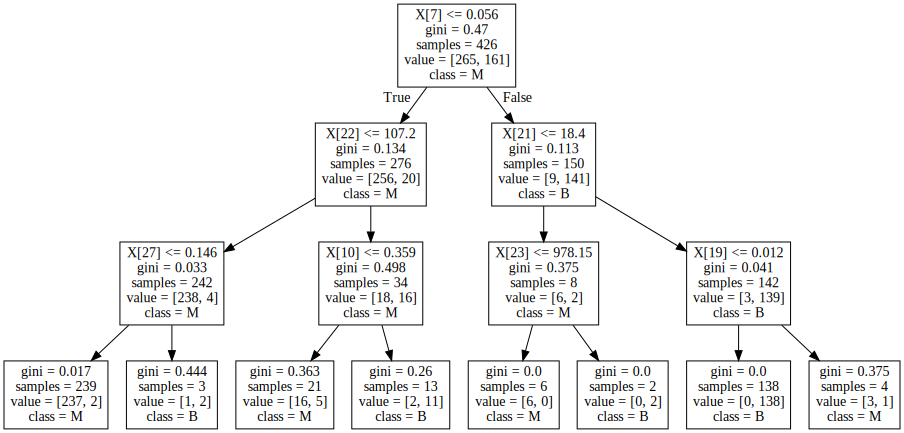

In [74]:
graphviz.Source(t_graph)

#### 3.2.3.2. 특성 중요도 정보제공

In [75]:
imp_feature = tree.feature_importances_  # 특성 중요도
nm_feature = cancer.columns[1:] # 특성명
imp_feature = pd.Series(imp_feature, index = nm_feature)

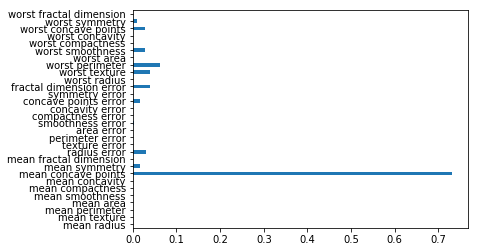

In [76]:
imp_feature.plot(kind='barh')

### 3.2.4. Random Forest (분류)

#### 3.2.4.1. 라이브러리의 적재 

In [77]:
from sklearn.tree import DecisionTreeClassifier # 의사결정트리

In [78]:
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트

In [79]:
from sklearn.model_selection import train_test_split

(참고) 주피터에서 각 분석 알고리즘의 주요파라미터를 활용하는 법

In [80]:
?RandomForestClassifier
# 주요 파라미터를 확인하는 방법

In [82]:
forest = RandomForestClassifier(n_estimators = 10, max_features='auto') # 모델의 갯수를 설정하는 것 (10개)
  # 과적합이 개선되지 않으면 100개이상이 될 수도 있다 (<--매개변수의 튜닝)
  # max_features : 최대 특성 수 (한 개의 특성만으로도 트리를 만들 수 있으므로 반드시 사용할 수가 아니라
  # 사용할 수 있는 가능성의 숫자이다)  

#### 3.2.4.2. 데이터 적재

In [83]:
cancer = pd.read_csv('data/cancer.csv')

y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

#### 3.2.4.3. 분석 데이터 준비 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3.2.4.4. 모델 훈련 및 평가

결정트리로 먼저 분석 수행하고 정확도를 확인

In [85]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.916083916083916)

RandomForest 분류로 분석 수행하고 정확도를 확인하고 결정트리와 비교

    * 과대적합이 개선되고
    * 테스트 데이터의 평가 결과도 정확도가 개선되었다

In [86]:
forest = RandomForestClassifier().fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test) 

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9929577464788732, 0.951048951048951)

#### 3.2.4.5. 파라미터의 조정

In [87]:
forest = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train) # 모델의 갯수를 10개에서 100개 증가
forest.score(X_train, y_train), forest.score(X_test, y_test) 

(1.0, 0.9790209790209791)

#### 3.2.4.6. CPU 코어의 사용 여부 지정

In [88]:
forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1).fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test) 

# n_jobs = -1 사용할 수 있는 모든 코어를 알아서 쓴다

(1.0, 0.965034965034965)

#### 3.2.4.7. 개선된 특성 중요도

더욱 종합적인 특성 중요도를 알 수 있다.

단일트리보다 훨씬 안정적이고, 신뢰할만하다.

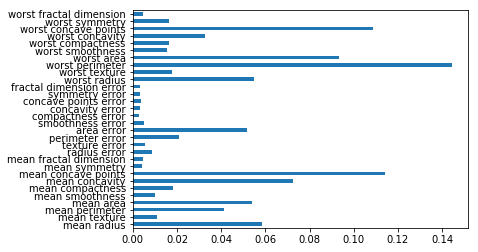

In [89]:
imp_f = forest.feature_importances_  # 특성 중요도
n_f = cancer.columns[1:] # 특성명
imp_f = pd.Series(imp_f, index = n_f)
imp_f.plot(kind ='barh')

중요도를 기준으로 내림차순 정렬을 한다.

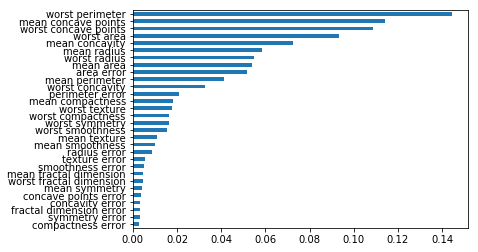

In [90]:
imp_f.sort_values().plot(kind ='barh')

### 3.2.5. Random Forest (회귀)

#### 3.2.5.1. 데이터 적재

In [91]:
boston = pd.read_csv('data/boston.csv')

#### 3.2.5.2. 분석 데이터 준비

In [92]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3.2.5.3. 모델 훈련 및 평가

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
tree_reg = RandomForestRegressor().fit(X_train, y_train)
tree_reg.score(X_train, y_train),tree_reg.score(X_test, y_test)

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9801501077613277, 0.8475987638877764)

#### 3.2.5.4. 그리드 서치

과적합이 발생하므로 --> 파라미터를 조절해본다

In [95]:
for n_tree in [100, 200, 300, 1000]:  # 나무개수
    tree_reg = RandomForestRegressor(n_estimators = n_tree).fit(X_train, y_train)
    train_score = tree_reg.score(X_train, y_train) # 훈련점수
    test_score = tree_reg.score(X_test, y_test) # 시험점수
    print('나무:', n_tree, '훈련:' , train_score, '시험:' , test_score)

나무: 100 훈련: 0.9834398533684952 시험: 0.8576440579327445
나무: 200 훈련: 0.9830337444609354 시험: 0.857544113498755
나무: 300 훈련: 0.9825053906441639 시험: 0.8560381727954686
나무: 1000 훈련: 0.9836311595054347 시험: 0.8593352102780707


#### 3.2.5.5. RandomForest의 단점

외삽을 수행하지 못한다

    * 외삽 : 훈련 데이터 범위 밖의 데이터를 예측하는 것

결정트리 모델군을 회귀에 적용할 때, 주의할 점 (p112)

##### 3.2.5.5.1. 데이터 적재

In [96]:
ram_price = pd.read_csv('data/ram_price.csv') # RAM 가격 (1메가바이트 당의 가격)

In [97]:
ram_price [:3]

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0


##### 3.2.5.5.2. 데이터 탐색

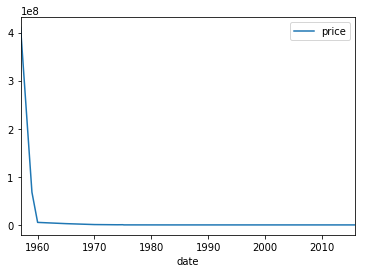

In [98]:
ram_price.set_index('date').plot(logy=False)

데이터의 패턴을 보니, 로그변형을 하면 선형 모델을 적용할 수 있을 것 같다

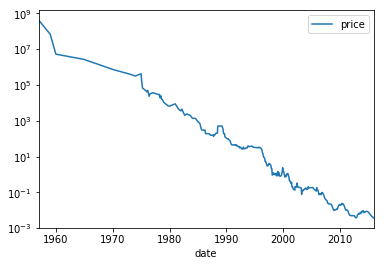

In [99]:
ram_price.set_index('date').plot(logy=True)

##### 3.2.5.5.3. 분석 데이터 준비

In [100]:
y = ram_price['price']
X = ram_price.values[:, 0].astype('float32')

In [101]:
X = X.reshape(-1,1) # 특징이 하나만 있어도 2차원의 형상을 유지해야한다 (-1은 0축값 사용하는 것)
X.shape 

(333, 1)

In [102]:
X

array([[1957.  ],
       [1959.  ],
       [1960.  ],
       [1965.  ],
       [1970.  ],
       [1973.  ],
       [1974.  ],
       [1975.  ],
       [1975.08],
       [1975.25],
       [1975.75],
       [1976.  ],
       [1976.17],
       [1976.42],
       [1976.58],
       [1977.08],
       [1978.17],
       [1978.25],
       [1978.33],
       [1978.5 ],
       [1978.58],
       [1978.75],
       [1979.  ],
       [1979.75],
       [1980.  ],
       [1981.  ],
       [1981.58],
       [1982.  ],
       [1982.17],
       [1982.67],
       [1983.  ],
       [1983.67],
       [1984.  ],
       [1984.58],
       [1985.  ],
       [1985.33],
       [1985.42],
       [1985.5 ],
       [1985.58],
       [1985.67],
       [1985.83],
       [1985.92],
       [1986.  ],
       [1986.08],
       [1986.17],
       [1986.25],
       [1986.33],
       [1986.42],
       [1986.5 ],
       [1986.58],
       [1986.67],
       [1986.75],
       [1986.92],
       [1987.  ],
       [1987.08],
       [19

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False) #섞지 않는 이유, 그래프를 그릴 목적

##### 3.2.5.5.4. 모델 훈련 및 평가

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [105]:
tree_reg = DecisionTreeRegressor().fit(X_train, y_train)

In [106]:
tree_reg.score(X_train, y_train), tree_reg.score(X_test, y_test)

(1.0, -14.414393924451142)

regressor를 사용하고 시험 점수를 봤는데... (-14.4로 나왔다) R^2가 -가 나온 것은 (너무 틀리면 -가 나오기도) --> 0으로 보면 된다.

즉... R^2 <=0 일수도 있다. (외삽의 결과가 좋지 않다는 의미이다)

In [107]:
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

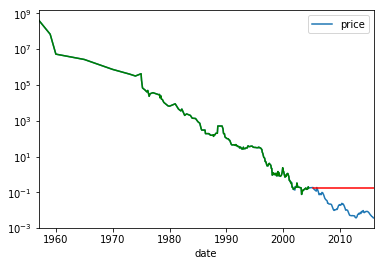

In [108]:
graph = ram_price.set_index('date').plot(logy=True)
graph.plot(X_train.flatten(), y_train_pred, color = 'g')
graph.plot(X_test.flatten(), y_test_pred, color ='r')

* 그래프의 해석

    1) 초록색은 훈련데이터로 예측한 그래프이고, 초록색 밑에 파란색이 깔려 있는 것이다.
    
    2) 파란색은 원본데이터이다.
    
    3) 훈련데이터 (초록색)은 원본인 파란색과 완벽하게 일치한다 (훈련 스코어가 1.0인 이유) 
    
    4) 하지만 외삽을 한 시험점수는 마지막값을 그대로 사용하는 것이다 (빨간 라인)

정리해보면

randomforest에서 회귀를 사용하는 경우에는 훈련 때의 최대, 최소를 벗어나는 경우에는 예측을 아예 할 수가 없다.

#### 외삽의 문제를 해결하는 방법 -> 선형모델

선형모델은 외삽의 문제를 겪지 않기 때문에 RandomForest로 하지 않고 선형모델을 적용한다.

### 3.2.6. 외삽을 위한 선형모델

#### 3.2.6.1. 모델 훈련 및 평가

In [109]:
from sklearn.linear_model import Ridge

In [110]:
ridge = Ridge(alpha = 1.0).fit(X_train, y_train)
ridge.score(X_train, y_train),ridge.score(X_test, y_test)

(0.09387412586451915, -1.6896646873064077e+17)

0.093874125864519153, -1.6896646873064077e+17) 훈련점수도 낮고, 시험점수도 낮다...

In [111]:
y2_train_pred = ridge.predict(X_train)
y2_test_pred = ridge.predict(X_test)

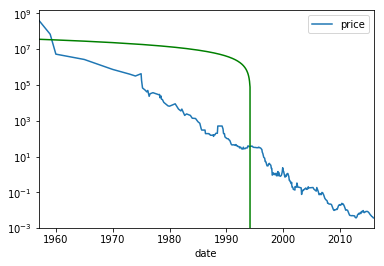

In [112]:
graph = ram_price.set_index('date').plot(logy=True)
graph.plot(X_train.flatten(), y2_train_pred, color = 'g')
graph.plot(X_test.flatten(), y2_test_pred, color ='r')

타켓변수를 로그변환을 해야 선형모델에 적절하므로, 모델 훈련할 때 로그변환을 하는 것을 잊지 않는다

In [113]:
logy_train = np.log(y_train)
logy_test = np.log(y_test)

In [114]:
ridge = Ridge(alpha = 1.0).fit(X_train, logy_train)
ridge.score(X_train, logy_train),ridge.score(X_test, logy_test)

(0.9686154682995611, 0.3752057284252303)

In [115]:
logy_train_pred = ridge.predict(X_train)
logy_test_pred = ridge.predict(X_test)

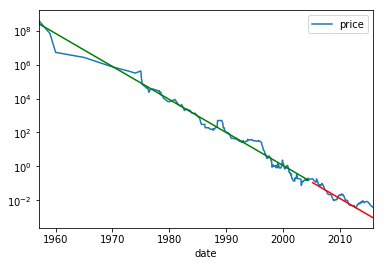

In [116]:
log_graph = ram_price.set_index('date').plot(logy=True)
log_graph.plot(X_train.flatten(), np.exp(logy_train_pred), color = 'g')
log_graph.plot(X_test.flatten(), np.exp(logy_test_pred), color ='r')

#### 그래프의 해석
    1) 파란색 : 원본 데이터
    2) 초록색 : train 데이터로 모델 훈련한 결과
    3) 빨간색 : test 데이터로 예측한 결과 
RandomForest의 외삽의 문제와는 달리 외삽의 효과가 개선된 것을 확인할 수 있다.

### 3.2.7. GBRT - Gradient Boosting Regression Tree (p122)

#### 3.2.7.1. 라이브러리 적재

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
? GradientBoostingClassifier  

# 모델에 대한 도움말 확인

#### 3.2.7.2. 데이터 준비

In [119]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3.2.7.3. 모델 훈련 및 평가

In [121]:
gbrt = GradientBoostingClassifier(n_estimators  = 100, max_depth= 3, learning_rate= 0.1)
  # learning_rate : 이전 오차를 얼마나 강하게 보정하는가 라는 의미

In [122]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [123]:
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(1.0, 0.916083916083916)

위 평가 결과와 randomforest의 평가결과와 비교를 해본다.

Gradient Boosting Regression Tree 의 적용은 randomforest의 결과를 개선해보려고 할 때, 적용해볼 수 있으나

파라미터의 조절이 어렵다는 특징이 있으나, 종종 randomforest보도 좋은 결과를 얻기도 한다.

In [124]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(1.0, 0.916083916083916)

위 결과의 해석

gbrt는 설정에 민감하다. 위 결과를 보면 (1.0, 0.972027972027972) <-- gbrt는 과대적합도 있고, 성능은 R.F와 비슷하다고 해석한다 (0.9953051643192489, 0.965034965034965)

bbrt에 과대적합이 발생하는 이유 -> 모델이 복잡하기 때문에... (즉 파라미터를 조정해본다) 파라미터 (n_estimators, max_depth, learning_rate)

### 3.2.8. GBRT의 파라미터 변경

In [124]:
gbrt = GradientBoostingClassifier(n_estimators  = 100, max_depth= 1, learning_rate= 0.1)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9929577464788732, 0.951048951048951)

In [125]:
gbrt = GradientBoostingClassifier(n_estimators  = 10, max_depth= 1, learning_rate= 0.1)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9366197183098591, 0.8951048951048951)

In [126]:
gbrt = GradientBoostingClassifier(n_estimators  = 10, max_depth= 1, learning_rate= 0.5)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.971830985915493, 0.958041958041958)

매개변수를 설정하는 것이 민감한 모델인 경우에는, 설정하는 것이 부담이되고, 일이 될 수 있다.

-> '그리드 서치'를 활용한다

### 3.2.9. GBRT에 그리드 서치의 적용

그리드 탐색을 활용한 모델 최적 설정 찾기 (p337)

In [127]:
set_range = {
    'n_estimators' : list(range(50,550,50)),  # 50, 100, 150, ..., 550까지
    'max_depth' : [1, 2, 3, 4], 
    'learning_rate' : [0.001, 0.01, 0.1, 1., 10.] # 경험적으로 로그스케일이 유의미한 차이를 아는데 도움이 되었다
} # 설정범위

#### 3.2.9.1. 그리드 서치 라이브러리의 적재

In [128]:
from sklearn.model_selection import GridSearchCV

#### 3.2.9.2. 그리드 서치의 실행

In [129]:
grid_search = GridSearchCV(estimator=gbrt, param_grid= set_range) 
  # gbrt : 평가모델을 의미, set_range : 설정조합
grid_search.fit(X_train, y_train) 
  # 모델을 훈련하듯이 fit을 한다 (조합을 탐색하므로 시간이 걸릴 수 있다)

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': [1, 2, 3, 4], 'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### 3.2.9.3. 그리드 서치 실행 결과의 확인

In [130]:
grid_search.best_score_ # 최적의 평가결과가 무엇인지 확인

0.9647887323943662

In [131]:
grid_search.best_params_ # 최적의 결과를 얻는 파라미터가 무엇인지 확인

{'learning_rate': 1.0, 'max_depth': 1, 'n_estimators': 50}

#### 3.2.9.4. 최적의 모델을 적용

In [132]:
best_model = grid_search.best_estimator_
best_model.score(X_train, y_train), best_model.score(X_test, y_test)

(1.0, 0.958041958041958)

위에 제일 상단의 best_score에는 '0.9647887323943662'였는데...

하단의 내용에는 (1.0, 0.97202797202797198)으로 나온다 이유는

그리드 탐색에는 훈련데이터만 가지고 사용한 것이고...테스트 데이터로 평가를 한 결과가 '0.972027972027972' 이기 때문

### 최적의 조합을 찾는 방법은 알았는데, 검증의 효과를 더 개선하고 싶다 (p324)
### 교차검증을 활용해본다.

### 3.2.10. 교차검증

#### 3.2.10.1. 라이브러리 적재

In [133]:
from sklearn.model_selection import cross_val_score

#### 3.2.10.2. 교차검증 실행

In [134]:
scores = cross_val_score(estimator=gbrt, X = X, y = y, cv = 3) 
  #  대상모델은 gbrt, CV가 train, test 로 나누므로, X_train, y_train으로 하지 않고, 통째로 X,y 넣어준다

#### 3.2.10.3. 교차검증의 평가

In [135]:
scores # 훈련을 3번 한 뒤에 각 test score를 아래에 보여준다

array([0.93157895, 0.95263158, 0.95238095])

In [136]:
np.mean(scores)

0.945530492898914

#### 3.2.10.4. 교차검증 파라미터의 변경

In [137]:
scores = cross_val_score(estimator=gbrt, X = X, y = y, cv = 5) 

In [138]:
scores # cv = 5인경우 (80%를 훈련데이터로 쓸 수 있기 때문에 성능이 좋아진다 cv=3보다)

array([0.93043478, 0.93043478, 0.98230088, 0.95575221, 0.9380531 ])

In [139]:
np.mean(scores)  # cv = 5인경우

0.9473951519815313

### 3.2.11. 교차검증과 그리드 서치의 결합

#### 3.2.11.1. 교차검증을 적용한 그리드 서치 실행

In [140]:
grid_search = GridSearchCV(estimator=gbrt, param_grid= set_range, cv = 10)

#### 3.2.11.2. 최적의 결과를 찾는다

In [141]:
grid_search.fit(X_train, y_train) # 실행에 오랜 시간이 걸린다.

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': [1, 2, 3, 4], 'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [142]:
# CV를 적용한 결과를 확인하는 법
grid_search.best_score_

0.9671361502347418

In [143]:
# 최적의 파라미터를 확인
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 350}

In [144]:
# 모델에 최적의 파라미터를 적용
best_model = grid_search.best_estimator_

In [145]:
# 적용 결과의 확인
best_model.score(X_train, y_train), best_model.score(X_test, y_test)

(1.0, 0.965034965034965)

## 3.3. Support Vector Machine (p134)

### 3.3.1. 라이브러리의 적재

In [146]:
from sklearn.svm import SVC, SVR # SVC 분류기, SVR 회귀

In [147]:
SVC?

### 3.3.2. 모델 선택

In [148]:
svc = SVC(kernel ='rbf', C = 1.0, gamma = 'auto') 
  # kernel : 거리측정방식, rbf = 가우시안 커널
  # C : 로지스틱 회의에서 사용한 것과 같음
  # gamma가 커지면 거리의 효과가 작아진다

### 3.3.3. 모델의 훈련 및 평가

In [149]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [150]:
svc.score(X_train, y_train), svc.score(X_test, y_test)

(1.0, 0.6223776223776224)

* 성능 평가 결과를 보면 좋지 않다

    (1.0, 0.6503496503496503) test 점수가 좋지 않다

    왜 ? --> SVM은 설정이 까다로운 모델이면서 데이터에 영향을 많이 받는 모델이다. (거리를 활용하기 때문)

* SVM은 거리를 기반으로 새 차원을 만들기 때문에 단위에 민감하다

### 3.3.4. 데이터의 특징 확인

In [151]:
cancer[:5]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* 위 데이터의 특징을 보면

    데이터의 각 스케일이 다르다 

### 3.3.5. 데이터 전처리와 스케일 조정

#### (p177) 데이터전처리와 스케일 조정

랜덤포리스트는 (결정트리)는 이런 조정이 필요없다

but SVM은 까다로워서 잘 맞춰줘야한다

#### 3.3.5.1. 라이브러리의 적재 (MinMax Scaling)

여러 스케일링 방법 중 (MinMax Scaling)을 적용함  - p179

In [152]:
from sklearn.preprocessing import MinMaxScaler  # minmax scaling의 결과는 0과 1사이에 값이 분포한다

#### 3.3.5.2. 스케일링 준비

In [153]:
change_scale = MinMaxScaler().fit(X_train) # 단위변환기 -> 각 열별 최대, 최소를 구해서 저장하는 함수

In [154]:
X_train_scaled = change_scale.transform(X_train) # 각 샘플에 스케일을 적용하는 것
X_test_scaled = change_scale.transform(X_test)

#### 3.3.5.3. 스케일링 적용 데이터 프레임의 확인

In [155]:
pd.DataFrame(X_train_scaled, columns=cancer.columns[1:])[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.251677,0.203585,0.248755,0.144383,0.340977,0.216800,0.136715,0.152982,0.325758,0.183156,...,0.197793,0.208594,0.196889,0.094829,0.405666,0.256652,0.277636,0.336186,0.283912,0.193650
1,0.096822,0.283734,0.093470,0.049730,0.275165,0.119512,0.034653,0.028673,0.313131,0.289552,...,0.090344,0.358566,0.084490,0.038855,0.446609,0.107851,0.051190,0.085911,0.293967,0.199847
2,0.142465,0.312479,0.151942,0.075517,0.399476,0.326416,0.149649,0.131312,0.435354,0.306397,...,0.117024,0.310757,0.120939,0.049921,0.331044,0.246220,0.153035,0.272371,0.270899,0.175397
3,0.266859,0.373013,0.270736,0.157256,0.308026,0.306554,0.254217,0.174453,0.253535,0.205970,...,0.223741,0.382470,0.235931,0.115497,0.422175,0.359770,0.359744,0.405842,0.196569,0.225231
4,0.247759,0.236388,0.246052,0.138763,0.540489,0.316143,0.090909,0.148857,0.535354,0.334542,...,0.210949,0.276608,0.198973,0.099370,0.504061,0.187358,0.113658,0.276460,0.296727,0.257747


### 3.3.6. 모델의 훈련 및 성과 평가 (스케일링의 효과 확인)

In [156]:
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)

(0.9530516431924883, 0.9300699300699301)

* 결과의 해석

    (0.9577464788732394, 0.9230769230769231) <-- 이 수치는 스크립트가 실행될 때마다 달라진다.

    모델의 정확도가 개선되었다... 즉 SVM에게는 데이터의 전처리가 중요하다...

### 3.3.7. SVM에 그리드 서치의 적용 

#### 그리고 SVM은 파라미터의 설정도 중요하므로 그리드 서치도 해본다

* cancer 데이터는 30차원의 선형모델도 좋은 성과가 나왔다 (즉... 선형성이 확인된 데이터다)

    그러므로 SVM을 하면 선형모델보다 좋지 않을 수 있다.

    따라서 비선형성이 강한 데이터 (boston과 같은)에서 SVM의 효과를 확인할 수 있을 것이다

* 선형성이 강한 데이터셋이라면 그냥 선형모델을 쓰는 것이 낫다
    
    비선형적 데이터셋에 대해 적용하는 것이 SVM을 쓸만한 이유가 되는 것 (결정트리 모델군과도 비교할만하다)

#### 3.3.7.1. 분석 데이터 준비

In [158]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3.3.7.2. 모델 훈련 및 평가

In [160]:
change_scale = MinMaxScaler().fit(X_train)
X_train_scaled = change_scale.transform(X_train)
X_test_scaled = change_scale.transform(X_test)

#### 3.3.7.3. 그리드 서치의 실행

In [161]:
set_range = {  # 설정범위
    'C' : [0.001, 0.01, 0.1, 1., 10., 100., 1000.],
    'gamma' : [0.001, 0.01, 0.1, 1., 10., 100., 1000.]    
} 

svm_gs = GridSearchCV(estimator=SVR(), param_grid= set_range, cv = 5)
svm_gs.fit(X_train_scaled, y_train)

C:\Users\jhhong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [162]:
# 최적의 평가결과를 확인
svm_gs.best_score_

0.8965158020997448

In [163]:
# 최적의 파라미터를 확인
svm_gs.best_params_

{'C': 100.0, 'gamma': 1.0}

#### 3.3.7.4. 모델에 최적 파라미터의 적용

In [164]:
best_svr = svm_gs.best_estimator_
best_svr.score(X_train_scaled, y_train), best_svr.score(X_test_scaled, y_test)

(0.965384394598595, 0.7371856866197869)

* 위 결과의 해석
    
    (0.89480571127930086, 0.77927993362036263) 이 점수 중 오른쪽은 결정트리가 못 넘었던 점수이다 
    <-- 위 숫자는 실행할 때마다 변경될 것임

    SVM은 까다롭지만, 좋은 결과를 내 줄 수 있는 모델이다

In [165]:
# 그리드 서치에 대한 도움말 확인하기
? GridSearchCV

### 3.3.8. 다른 스케일링 기법의 확인

#### 3.3.8.1. 정규분포

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
change_scale_normal = StandardScaler().fit(X_train, y_train)
X_train_normal = change_scale_normal.transform(X_train)

In [168]:
pd.DataFrame(X_train_normal)[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.387961,-0.483808,-1.026557,-0.271394,-0.362780,-1.020329,0.729251,-0.583419,-0.503101,-0.634147,-0.856576,0.433456,0.285269
1,-0.394771,-0.483808,0.413587,-0.271394,-1.005731,-0.385680,-0.922459,0.810566,-0.619937,-0.675917,-1.135758,0.433456,-0.318775
2,-0.112978,-0.483808,1.239446,-0.271394,2.816744,-1.456015,0.925883,-0.995725,-0.503101,0.004346,-1.740653,-2.923846,0.489433
3,-0.387796,-0.483808,-0.072297,-0.271394,-0.547739,0.145857,-1.279972,0.063696,-0.619937,-0.747524,0.074031,0.312677,-0.462394
4,-0.356634,-0.483808,-0.172976,-0.271394,-0.063323,0.156023,-0.032252,-0.134328,-0.619937,-0.586409,-0.019030,0.415050,-0.324407


# 4. 기타

## 4.1. 훈련모델을 파일로 내보내기

### 4.1.1. 라이브러리 적재

In [169]:
import pickle # 바닐라 파이썬에서 제공하는 기능

### 4.1.2. 모델을 파일로 내보내기

In [170]:
y = ram_price['price']
X = ram_price.values[:, 0].astype('float32')

In [171]:
X = X.reshape(-1,1) # 특징이 하나만 있어도 2차원의 형상을 유지해야한다 (-1은 0축값 사용하는 것)
X.shape 

(333, 1)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False) #섞지 않는 이유, 그래프를 그릴 목적

In [173]:
ridge = Ridge(alpha = 1.0).fit(X_train, logy_train)

In [174]:
model = ridge

In [175]:
with open('trained_model.pkl', 'wb') as pkl_file:  # 'wb'는 쓰기모드이면서 binary 파일로 연다는 의미
    pickle.dump(model, pkl_file) # trained_model.pkl 파일이 생성되었다.

### 4.1.3. 모델을 삭제

In [176]:
del model # 모델을 지운다

In [177]:
model # error가 발생하는 것을 알 수 있다 (모델이 지워졌음을 확인)

NameError: name 'model' is not defined

### 4.1.4. 파일에서 모델을 읽기

In [178]:
with open('trained_model.pkl','rb') as pkl_file: # 'rb' = read binary
    model = pickle.load(pkl_file)

In [179]:
model # error가 발생하지 않는다

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [180]:
y_pred = model.predict(X) # 모델에 새로운 데이터를 적용해서 예측을 수행한다

In [181]:
y_pred

array([ 1.93800049e+01,  1.84849243e+01,  1.80374146e+01,  1.57997437e+01,
        1.35620728e+01,  1.22194824e+01,  1.17719727e+01,  1.13244019e+01,
        1.12886353e+01,  1.12125244e+01,  1.09887695e+01,  1.08768921e+01,
        1.08007812e+01,  1.06889038e+01,  1.06173706e+01,  1.03935547e+01,
        9.90570068e+00,  9.86993408e+00,  9.83416748e+00,  9.75805664e+00,
        9.72229004e+00,  9.64617920e+00,  9.53430176e+00,  9.19866943e+00,
        9.08679199e+00,  8.63922119e+00,  8.37969971e+00,  8.19171143e+00,
        8.11560059e+00,  7.89184570e+00,  7.74414062e+00,  7.44427490e+00,
        7.29663086e+00,  7.03710938e+00,  6.84912109e+00,  6.70141602e+00,
        6.66113281e+00,  6.62536621e+00,  6.58953857e+00,  6.54925537e+00,
        6.47766113e+00,  6.43737793e+00,  6.40155029e+00,  6.36578369e+00,
        6.32550049e+00,  6.28967285e+00,  6.25390625e+00,  6.21356201e+00,
        6.17779541e+00,  6.14202881e+00,  6.10168457e+00,  6.06591797e+00,
        5.98980713e+00,  

# Ch03의 끝.